In [49]:
# Importamos las librerías necesarias.
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [50]:
# Cargamos la base de datos.
iris = datasets.load_iris()

In [51]:
# 1. Debemos describir brevemente la información que nos entrega la base de datos.

tempDF = pd.DataFrame(iris.data, columns = iris.feature_names)

iris.data
iris.keys()
iris["feature_names"]
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

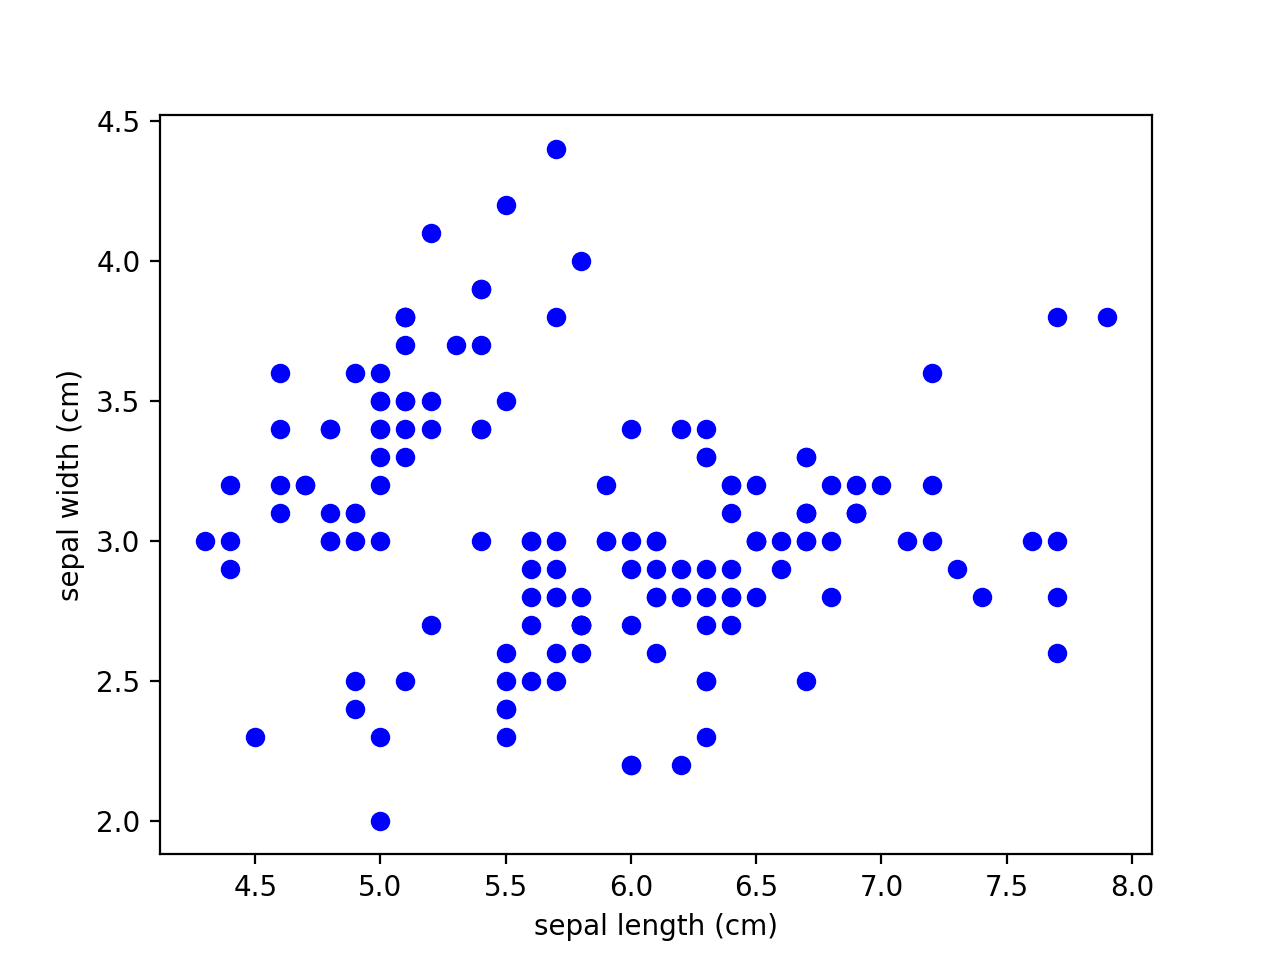

In [52]:
# 2. Ahora, debemos graficar las relaciones con las cuales buscaremos realizar el agrupamiento de clusters (por ejemplo, largo del sépalo versus ancho del
# sépalo.

plt.scatter(tempDF["sepal length (cm)"], tempDF["sepal width (cm)"], c = "blue")
plt.xlabel("sepal length (cm)", fontsize = 10)
plt.ylabel("sepal width (cm)", fontsize = 10)
plt.show()

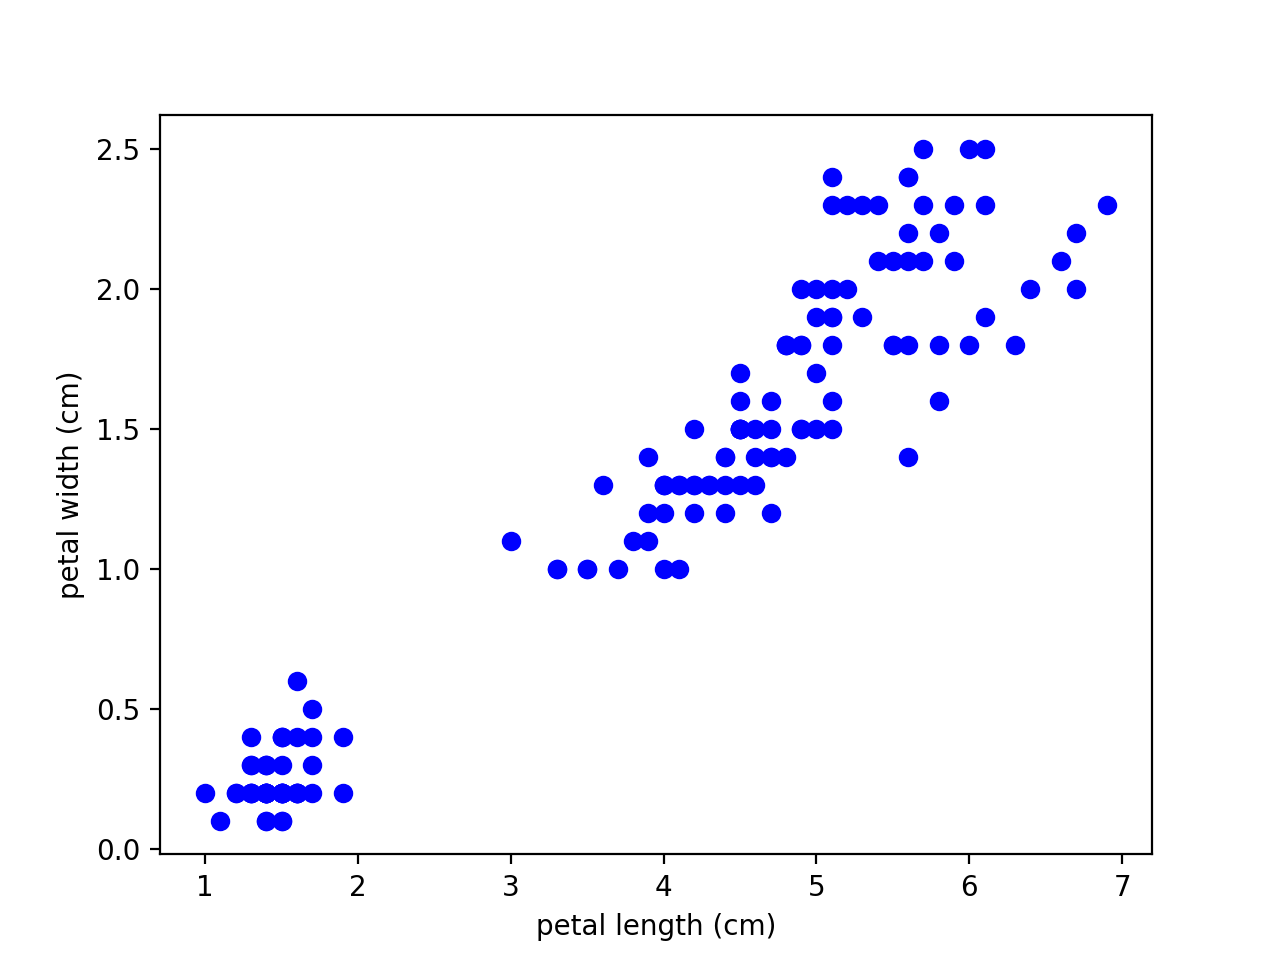

In [53]:
# 2. Ahora, debemos graficar las relaciones con las cuales buscaremos realizar el agrupamiento de clusters (por ejemplo, largo del pétalo versus ancho del
# pétalo).

# # Creamos el gráfico de dispersión.
plt.scatter(tempDF["petal length (cm)"], tempDF["petal width (cm)"], c = "blue")
plt.xlabel("petal length (cm)", fontsize = 10)
plt.ylabel("petal width (cm)", fontsize = 10)
plt.show()



In [54]:
# 3. Lo siguiente es entrenar el modelo y determinar los centros de cada cluster, su inercia y etiqueta.

# Creamos un objeto K-means con las condiciones iniciales.
km = KMeans(n_clusters= 3, n_init= 10)

# Entrenamos el modelo de datos.
km = km.fit(tempDF)
km

KMeans(n_clusters=3, n_init=10)

In [55]:
# Revisamos las características del modelo entrenado.
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [56]:
pd.DataFrame(km.cluster_centers_, columns = tempDF.columns)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053


In [57]:
# Determinamos su inercia.
km.inertia_


78.851441426146

In [58]:
# Etiquetas para saber a que cluster pertenece cada dato.
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [59]:
# Ahora podemos crear una columna más a nuestro data frame para saber dentro de la división de nuestros 5 clústeres, a cuál de ellos pertenece cada dato.
tempDF["cluster"] = km.labels_
tempDF


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [60]:
# 4. Debemos, además, graficar los clusters.

# Importamos las librerías necesarias.
import plotnine as ptn
from plotnine import *

labels = pd.Series(km.labels_, index = tempDF.index, dtype = "category")
labels

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    0
147    2
148    2
149    0
Length: 150, dtype: category
Categories (3, int64): [0, 1, 2]

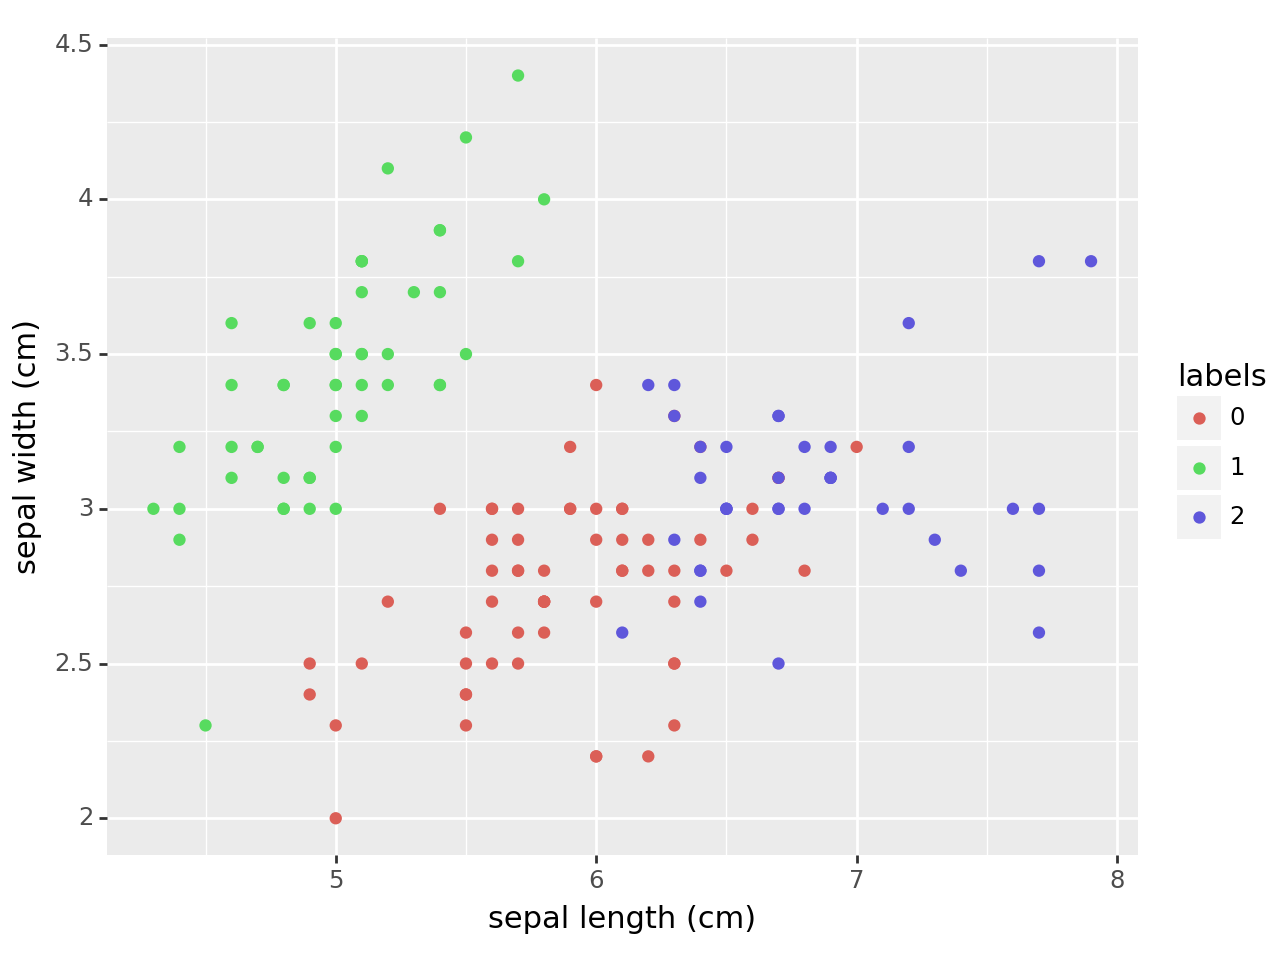

<Figure Size: (640 x 480)>

In [61]:
# Graficamos los clusters del sépalo.
from plotnine import ggplot, aes, geom_point
ggplot(tempDF, aes(x="sepal length (cm)", y="sepal width (cm)", color="labels")) + geom_point()


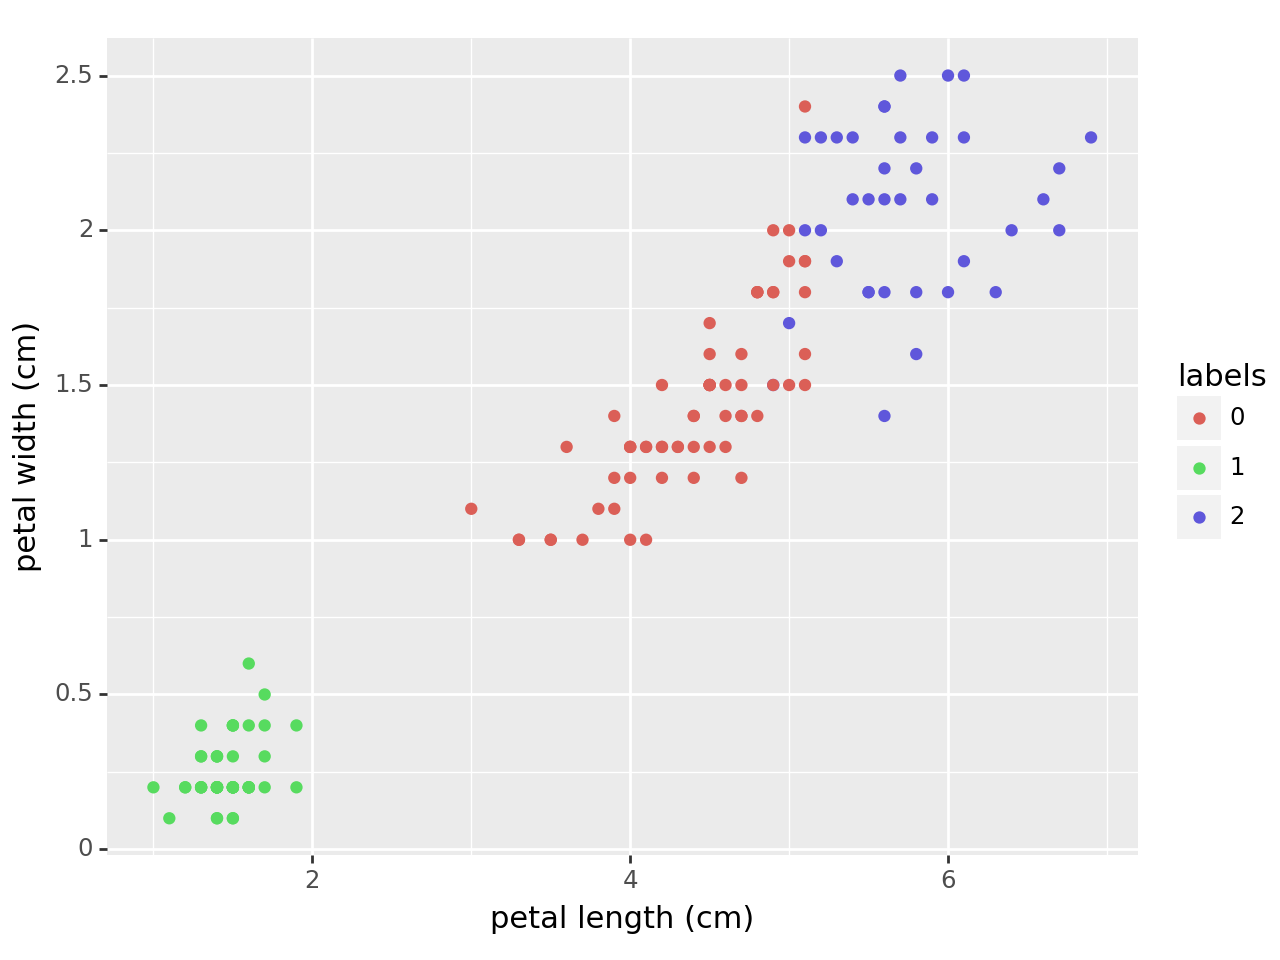

<Figure Size: (640 x 480)>

In [62]:
# Graficamos los clusters del pétalo.
ggplot(tempDF, aes(x="petal length (cm)", y="petal width (cm)", color="labels")) + geom_point()

In [63]:
# 5. Por último, mediante el método del codo, determinemos cuál es el número de clusters ideales para realizar la agrupación.

# Entrenamos el modelo.
sse = []
numk = 18
for k in range(1,numk ):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(tempDF)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10

<Axes: >

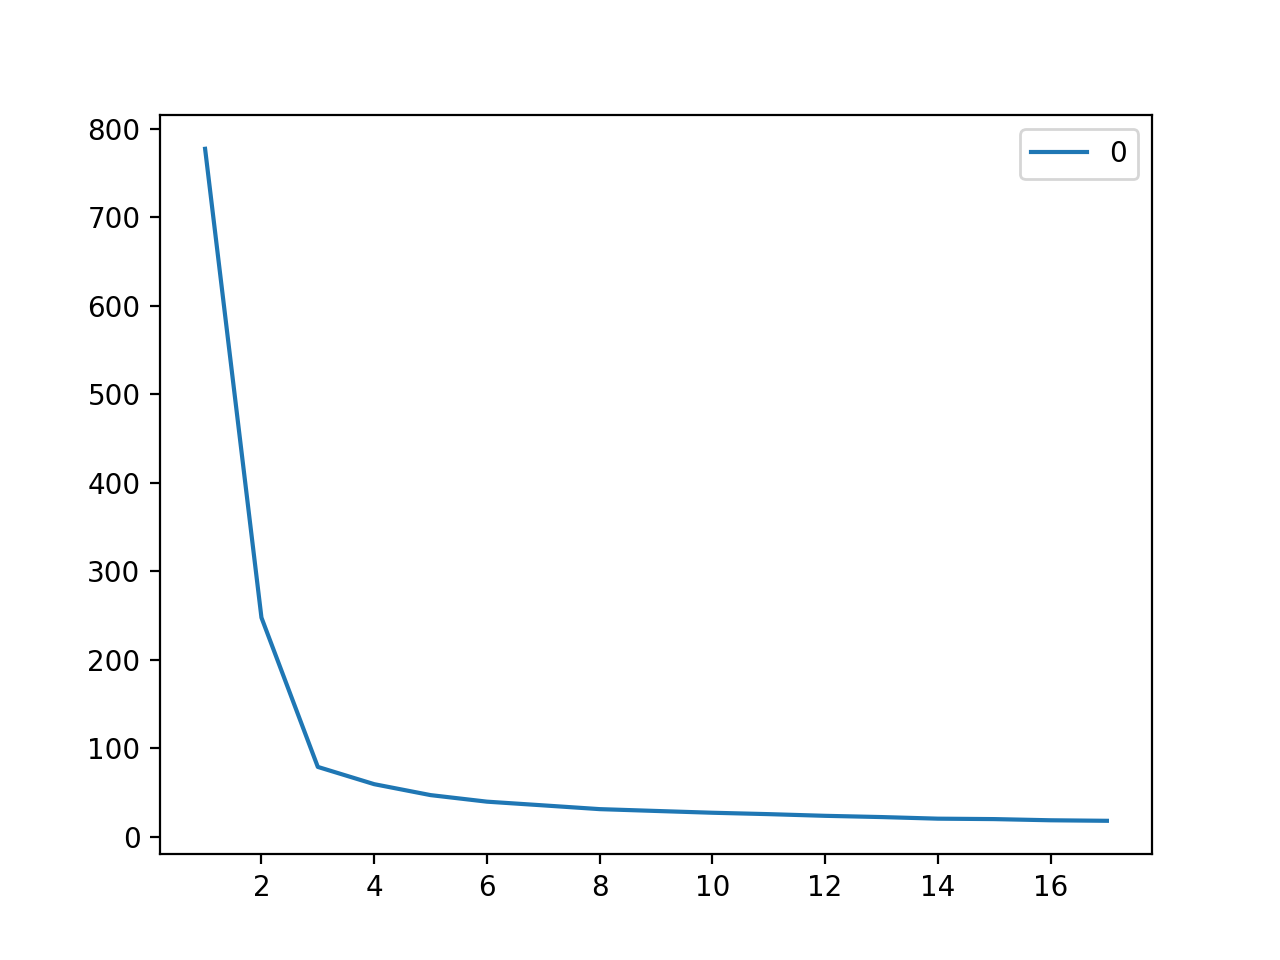

In [64]:
# Graficamos.

pd.DataFrame(sse, index=np.arange(1, numk)).plot()

El quiebre más significativo de los datos ocurre cuando el número de clústeres es 3.

Basándonos en el análisis y la agrupación realizados en el conjunto de datos Iris utilizando el algoritmo K-means, así como el método del codo para determinar el número óptimo de clusters, podemos concluir lo siguiente:

**Descripción de la Información en la Base de Datos:** La base de datos Iris contiene información sobre las características de las flores del género Iris, incluyendo medidas del sépalo y el pétalo. Se trata de un conjunto de datos ampliamente utilizado en problemas de clasificación y agrupamiento.

**Graficación de las Relaciones entre Largo y Ancho del Sépalo:** Al graficar la relación entre el largo y el ancho del sépalo, observamos cierta estructura en los datos que sugiere la existencia de grupos o clusters.

**Número Óptimo de Clusters:** Utilizando el método del codo, hemos identificado que el número óptimo de clusters para estos datos es 3. Este resultado se obtuvo al observar una disminución significativa en la inercia (variación dentro de los clusters) cuando se pasa de 2 a 3 clusters.

**Agrupación y Visualización de Clusters:** Al aplicar el algoritmo K-means con 3 clusters y visualizar los resultados en un gráfico de dispersión, pudimos observar cómo se agrupan los puntos de datos en tres clusters distintos. Los centroides de los clusters están marcados en el gráfico, lo que indica las ubicaciones centrales de cada grupo.

En resumen, hemos logrado agrupar eficazmente las flores del género Iris en tres clusters distintos basándonos en sus medidas de sépalo. Este enfoque no supervisado nos ha permitido encontrar patrones intrínsecos en los datos que podrían ser útiles para la clasificación y el análisis posterior en el contexto del Vivero de San Juan.